In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/life_ladder_2005_2022_no1_gdp_sosupp.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.describe()

,year,life_ladder,log_gdp_per_capita,social_support
count,2166.000000,2166.000000,2166.000000,2166.000000
mean,2014.156048,5.481281,9.385013,0.811091
std,4.708856,1.121787,1.151911,0.120215
min,2005.000000,2.179000,5.527000,0.290000
25%,2010.000000,4.642500,8.496000,0.747000
50%,2014.000000,5.433000,9.498000,0.836000
75%,2018.000000,6.309750,10.366500,0.905000
max,2022.000000,8.019000,11.664000,0.987000


In [10]:
df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2007, 2020, 2022, 2006, 2005])

In [52]:
year_lst = list(np.sort(df.year.unique()))
year_lst

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [24]:
df.query('year == 2022').sort_values(by= 'life_ladder', ascending= False ).head(10)

In [133]:
top_10_over_years = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    top_10_over_years = pd.concat([top_10_over_years,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).head(5)],
                                  axis = 0)


#top_10_over_years   

In [67]:
top_10_over_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 499 to 1145
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_name        180 non-null    object 
 1   year                180 non-null    object 
 2   life_ladder         180 non-null    float64
 3   log_gdp_per_capita  180 non-null    float64
 4   social_support      180 non-null    float64
dtypes: float64(3), object(2)
memory usage: 8.4+ KB


In [134]:
top_10_over_years.country_name.value_counts()

country_name
Denmark          17
Finland          12
Switzerland       9
Norway            9
Iceland           9
Netherlands       8
Canada            5
Sweden            5
Israel            5
Australia         2
New Zealand       2
Costa Rica        2
Austria           2
United States     1
Ireland           1
Venezuela         1
Name: count, dtype: int64

In [135]:
top_1_over_years = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    top_1_over_years = pd.concat([top_1_over_years,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).head(1)],
                                  axis = 0)


top_1_over_years   

,country_name,year,life_ladder,log_gdp_per_capita,social_support
499,Denmark,2005,8.019,10.849,0.972
616,Finland,2006,7.672,10.745,0.965
500,Denmark,2007,7.834,10.889,0.954
501,Denmark,2008,7.971,10.878,0.954
502,Denmark,2009,7.683,10.822,0.939
503,Denmark,2010,7.771,10.836,0.975
504,Denmark,2011,7.788,10.845,0.962
1845,Switzerland,2012,7.776,11.107,0.947
330,Canada,2013,7.594,10.752,0.936
507,Denmark,2014,7.508,10.860,0.956


In [136]:
top_1_over_years.country_name.value_counts()

country_name
Finland        8
Denmark        7
Switzerland    1
Canada         1
Norway         1
Name: count, dtype: int64

[Text(0.5, 1.0, 'Top 5 Happiest Countries 2005-2022')]

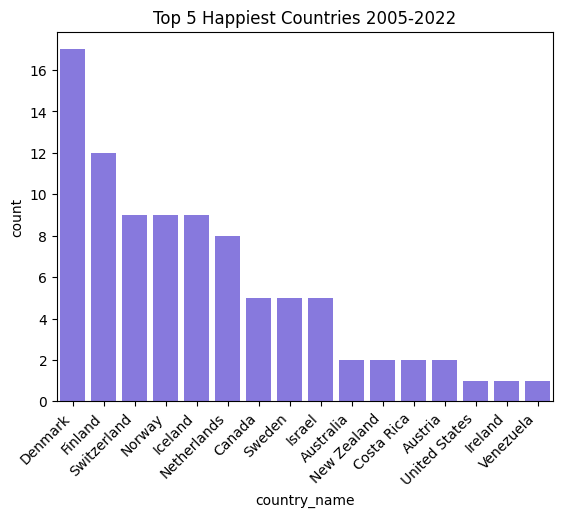

In [146]:
g=sns.countplot(data = top_10_over_years,
              x = 'country_name',
              order = top_10_over_years.country_name.value_counts().index,
              color = 'mediumslateblue')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title = 'Top 5 Happiest Countries 2005-2022')

[Text(0.5, 1.0, 'Winner of Happiest Countries 2005-2022')]

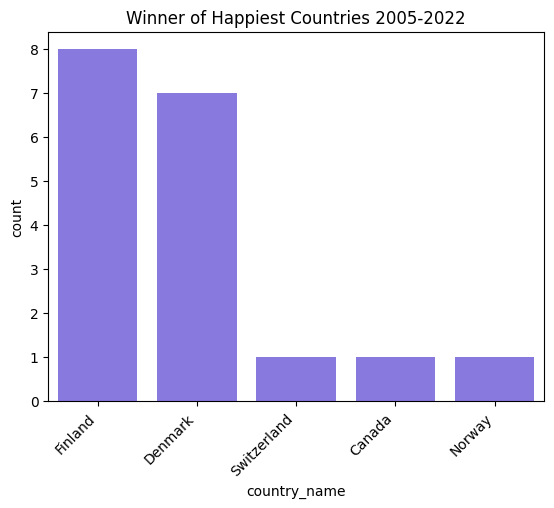

In [138]:
g=sns.countplot(data = top_1_over_years,
              x = 'country_name',
              order = top_1_over_years.country_name.value_counts().index,
              color = 'mediumslateblue')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title = 'Winner of Happiest Countries 2005-2022')

In [139]:
top_10_over_years.describe()

,life_ladder,log_gdp_per_capita,social_support
count,90.000000,90.000000,90.000000
mean,7.559233,10.827656,0.951467
std,0.147267,0.261930,0.018707
min,7.182000,9.672000,0.889000
25%,7.463250,10.755750,0.942250
50%,7.529000,10.866000,0.951000
75%,7.644750,10.938250,0.964750
max,8.019000,11.168000,0.985000


In [140]:
loosers_over_years = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    loosers_over_years = pd.concat([loosers_over_years,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).tail(5)],
                                  axis = 0)

   

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_69399/3832663129.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0.5, 1.0, 'The 5 UnHappiest Countries 2005-2022')]

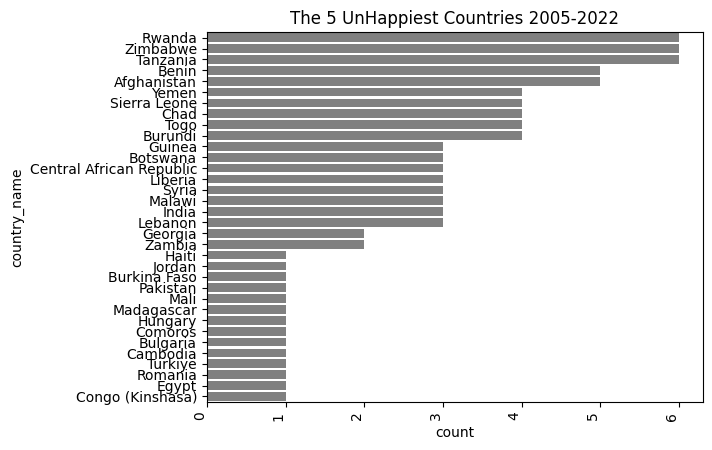

In [149]:
g=sns.countplot(data = loosers_over_years,
              y = 'country_name',
              order = loosers_over_years.country_name.value_counts().index,
              color = 'gray')
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
g.set(title = 'The 5 UnHappiest Countries 2005-2022')